**SNR-like Radiating Blast Wave with TITAN**

http://nbviewer.ipython.org/github/BenWibking/talks/blob/master/Plot%2520blast%2520wave.ipynb

In [61]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

nframes = 35

def zeroneg(array):
    myarray = array.copy()
    myarray[myarray<0.] = 0.
    return myarray

def zeropos(array):
    myarray = array.copy()
    myarray[myarray>0.] = 0.
    return myarray

arrays = [np.loadtxt('./src/RLST.out.%02d' % i,skiprows=5) for i in xrange(1,nframes)]
radius = [array[:,1] for array in arrays]
ext_M = [array[:,2] for array in arrays]
density = [array[:,3] for array in arrays]
tau = [array[:,4] for array in arrays]
T_gas = [array[:,5] for array in arrays]
L = [array[:,6] for array in arrays]
T_rad = [array[:,7] for array in arrays]
u = [array[:,8] for array in arrays]
P_gas = [array[:,9] for array in arrays]
fedd = [array[:,10] for array in arrays]
resolution = [array[:,11] for array in arrays]
P_rad = [array[:,12] for array in arrays]
accel_rad_pos = [zeroneg(array[:,13]) for array in arrays]
accel_gas_pos = [zeroneg(array[:,14]) for array in arrays]
accel_rad_neg = [zeroneg(-array[:,13]) for array in arrays]
accel_gas_neg = [zeroneg(-array[:,14]) for array in arrays]

In [20]:
from matplotlib import animation
from IPython.display import HTML

from tempfile import NamedTemporaryFile

VIDEO_TAG = """<video controls>
 <source src="data:video/x-m4v;base64,{0}" type="video/mp4">
 Your browser does not support the video tag.
</video>"""

def animate_simulation(sx,sy,labelname,sz=None,labelname_z=None,logy=True,ylim=None):
    # First set up the figure, the axis, and the plot element we want to animate
    fig = plt.figure()
    ax = plt.axes()#xlim=(0, 2), ylim=(-2, 2))
    line, = ax.plot(sx[0], sy[0], lw=2, label=labelname)
    if sz:
        line_z, = ax.plot(sx[0],sz[0],lw=2, label=labelname_z)
    ax.set_xscale('log')
    if logy:
        ax.set_yscale('log')
    ax.set_xlim(sx[0].min(),sx[0].max())
    if ylim:
        ax.set_ylim(ylim)
    ax.legend(loc='best')

    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return line,

    # animation function.  This is called sequentially
    def animate(i):
        x = sx[i]
        y = sy[i]
        line.set_data(x, y)
        if sz:
            z = sz[i]
            line_z.set_data(x, z)
        return line,

    # call the animator.  blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=nframes-1, interval=1000, blit=True)

    def anim_to_html(anim):
        if not hasattr(anim, '_encoded_video'):
            with NamedTemporaryFile(suffix='.mp4') as f:
                anim.save(f.name, fps=20, extra_args=['-vcodec', 'libx264'])
                video = open(f.name, "rb").read()
            anim._encoded_video = video.encode("base64")
    
        return VIDEO_TAG.format(anim._encoded_video)

    def display_animation(anim):
        plt.close(anim._fig)
        return HTML(anim_to_html(anim))
    
    # call our new function to display the animation
    return display_animation(anim)

In [21]:
animate_simulation(radius,density,"density")

In [43]:
animate_simulation(radius,T_gas,"gas T",sz=T_rad,labelname_z="rad T")
# plot (1/3)*aT^4 = nkT

In [42]:
animate_simulation(radius,P_gas,"gas P",sz=P_rad,labelname_z="rad P")

number density: 5.97871577185e+17


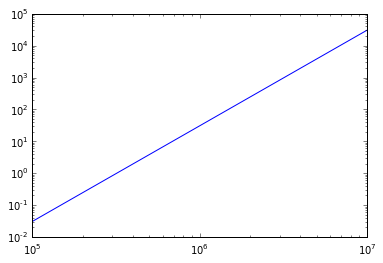

In [8]:
k = 1.3807e-16 # erg/K
arad = 7.5646e-15 # erg cm^-3 K^-4
m_H = 1.6726e-24 # g

n = 1.e-6 / m_H
print "number density:",n
T = np.logspace(5,7,100)
ratio_rad_to_gas = (1./3.) * arad * T**3 / (n * k)

plt.plot(T,ratio_rad_to_gas)
plt.xscale('log')
plt.yscale('log')

In [70]:
animate_simulation(radius,accel_rad_pos,"rad. accel.",ylim=(1.e-4,1.e9),
                  sz=accel_rad_neg,labelname_z='rad. accel. (neg)')

In [66]:
animate_simulation(radius,accel_gas_neg,"negative gas accel.",ylim=(1.e-5,1.e7),
                   sz=accel_rad_pos,labelname_z='rad. accel.')

In [71]:
animate_simulation(radius,accel_gas_pos,"gas accel.",ylim=(1.e-4,1.e9),
                  sz=accel_gas_neg,labelname_z='gas accel. (neg)')